In [1]:
import numpy as np
import os
print(os.getcwd())

/Users/administrator/python-data/data21/book-data/deep04


In [2]:
os.chdir(os.getcwd() + '/img-animal')

In [3]:
os.getcwd()

'/Users/administrator/python-data/data21/book-data/deep04/img-animal'

In [4]:
data_dir = os.getcwd()

In [5]:
## 이미지 파일 리스트 4000개 읽어봐서, 각각의 이미지파일마다 타겟 설정

In [9]:
#import glob
from glob import glob

In [11]:
data_list = glob('*.jpg')
data_list[:5]

['dog.1753.jpg', 'cat.1211.jpg', 'dog.775.jpg', 'cat.1577.jpg', 'cat.952.jpg']

In [13]:
len(data_list), type(data_list)

(4000, list)

In [14]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [17]:
#string을 특정한 기준에 의해 token으로 끊어 리스트를 리턴
token = text_to_word_sequence(data_list[0])
token, type(token)

(['dog', '1753', 'jpg'], list)

In [18]:
token[0]

'dog'

In [23]:
label = []

In [24]:
for x in data_list[:100]:
    token = text_to_word_sequence(x)
    label.append(token[0])
len(label), label[:5]

(100, ['dog', 'cat', 'dog', 'cat', 'cat'])

In [26]:
label2 = []

In [27]:
for x in data_list:
    token = text_to_word_sequence(x)
    label2.append(token[0])
len(label2), label2[:5]

(4000, ['dog', 'cat', 'dog', 'cat', 'cat'])

In [28]:
## 라벨인코더-> 카테고리형 문자를 숫자로 자동 변환해주는 역할
from sklearn.preprocessing import LabelEncoder

In [29]:
encoder = LabelEncoder()
label3 = encoder.fit_transform(label2)
label3[:5]

array([1, 0, 1, 0, 0])

In [31]:
import cv2
import matplotlib.pyplot as plt

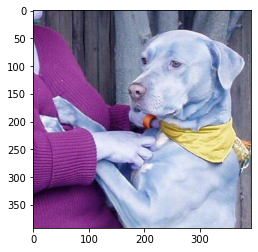

In [32]:
img0 = cv2.imread(data_list[0])
plt.imshow(img0)

In [33]:
img.shape

(392, 393, 3)

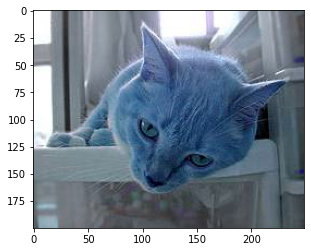

In [34]:
img1 = cv2.imread(data_list[1])
plt.imshow(img1)

In [36]:
img1.shape

(200, 249, 3)

In [38]:
## 표준화
image1 = img1/255
image1[0][0]

array([1., 1., 1.])

In [40]:
## 크기를 동일하게 변경하여 맞추어주자.!

In [41]:
data_height = 150
data_width = 150
channel_n = 3

In [42]:
image2 = cv2.resize(image1, (data_height, data_width))
image2.shape

(150, 150, 3)

In [44]:
### 4000개의 크기를 다 변경해주세요.
img_list = [] 
#255로 표준화시켜주고, 크기변경하고 나서의 결과를 모아주기 위한 리스트
for x in data_list:
        scaled_one = cv2.imread(x) / 255
        resized_one = cv2.resize(scaled_one, (data_height, data_width))
#         print('변경전: ', scaled_one.shape)
#         print('변경후: ', resized_one.shape)
        img_list.append(resized_one)
len(img_list), img_list[0].shape

(4000, (150, 150, 3))

In [45]:
img_list[0]

array([[[0.90934588, 0.85564706, 0.98113725],
        [0.88376627, 0.83976471, 0.9652549 ],
        [0.85202876, 0.82352941, 0.9527451 ],
        ...,
        [0.26867712, 0.2843634 , 0.37848105],
        [0.28398614, 0.29967242, 0.39379007],
        [0.30819556, 0.32388183, 0.41799948]],

       [[0.88294275, 0.8445098 , 0.95721569],
        [0.85835294, 0.82698039, 0.94631373],
        [0.83388235, 0.80662745, 0.93643137],
        ...,
        [0.27094118, 0.29239216, 0.37105882],
        [0.29470588, 0.31819608, 0.39278431],
        [0.31603922, 0.34047059, 0.41317647]],

       [[0.83639216, 0.81544967, 0.92159346],
        [0.81760392, 0.79636601, 0.91366928],
        [0.79528758, 0.77240523, 0.91      ],
        ...,
        [0.27515033, 0.30260131, 0.36142484],
        [0.30660131, 0.33405229, 0.39287582],
        [0.31577908, 0.34323007, 0.40205359]],

       ...,

       [[0.53263791, 0.18679477, 0.54197124],
        [0.54855294, 0.20737647, 0.54478039],
        [0.52988235, 0

In [50]:
total_images = np.zeros((5, data_height, data_width, channel_n))
total_images[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [51]:
data_list_len = len(data_list)
data_list_len

4000

In [52]:
def make_file(dat_height, data_width, channel_n, data_list_len):
    label = []
    images = np.zeros((data_list_len, dat_height, data_width, channel_n))
    for i, image in enumerate(data_list):
        
        ##라벨링
        token = text_to_word_sequence(image)
        label.append(token[0])
        
        ## 이미지 읽고, 스케일링, 리사이징
        image = cv2.imread(image)
        image = cv2.resize(image, (dat_height, data_width)) / 255
        images[i, :, :, :] = image
    label = np.array(label)
    return (label, images)    

In [54]:
(label, images) = make_file(data_height, data_width, channel_n, data_list_len)

In [55]:
label.shape

(4000,)

In [56]:
images.shape

(4000, 150, 150, 3)

In [58]:
label

array(['dog', 'cat', 'dog', ..., 'cat', 'cat', 'dog'], dtype='<U3')

In [60]:
items = label
encoder = LabelEncoder()
label = encoder.fit_transform(items)
label, len(label) 

(array([1, 0, 1, ..., 0, 0, 1]), 4000)

In [61]:
encoder.classes_

array([0, 1])

In [62]:
from sklearn.model_selection import train_test_split
x = images
y = label

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size= 0.2,
                                                    random_state=55
                                                   )
print(X_train.shape, X_test.shape)

(3200, 150, 150, 3) (800, 150, 150, 3)


In [63]:
x[0]

array([[[0.90980392, 0.85490196, 0.98039216],
        [0.88235294, 0.83921569, 0.96470588],
        [0.85098039, 0.82352941, 0.95294118],
        ...,
        [0.26666667, 0.28235294, 0.37647059],
        [0.28235294, 0.29803922, 0.39215686],
        [0.30980392, 0.32156863, 0.41568627]],

       [[0.88235294, 0.84313725, 0.95686275],
        [0.85882353, 0.82745098, 0.94509804],
        [0.83529412, 0.80784314, 0.9372549 ],
        ...,
        [0.27058824, 0.29411765, 0.36862745],
        [0.29411765, 0.31764706, 0.39215686],
        [0.31372549, 0.34117647, 0.41176471]],

       [[0.83529412, 0.81568627, 0.92156863],
        [0.81568627, 0.79607843, 0.91372549],
        [0.79607843, 0.77254902, 0.90980392],
        ...,
        [0.2745098 , 0.30196078, 0.36078431],
        [0.30588235, 0.33333333, 0.39215686],
        [0.31764706, 0.34117647, 0.4       ]],

       ...,

       [[0.53333333, 0.18823529, 0.54117647],
        [0.54901961, 0.20784314, 0.54509804],
        [0.52941176, 0

In [64]:
## 딥러닝 모델을 만들어보자.
from tensorflow.keras.layers import Dropout
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [66]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(data_height, data_width, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(1, activation='sigmoid')) #결과가 엘리먼트로 출력됨. 0.5를 기준으로 판별
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 64)               

In [67]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

In [68]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
checkpoint = keras.callbacks.ModelCheckpoint('best_animalCNN_model.h5')
                                               
cnn_history = model.fit( X_train, 
                         y_train,                
                         batch_size=128,
                         epochs=20,
                         validation_data = (X_test, y_test),
                         callbacks = [early_stopping, checkpoint],
                         verbose=2
                        )

Epoch 1/20
25/25 - 33s - loss: 0.8273 - accuracy: 0.4975 - val_loss: 0.6932 - val_accuracy: 0.4975 - 33s/epoch - 1s/step
Epoch 2/20
25/25 - 30s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4975 - 30s/epoch - 1s/step
Epoch 3/20
25/25 - 31s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4975 - 31s/epoch - 1s/step
Epoch 4/20
25/25 - 29s - loss: 0.6930 - accuracy: 0.5056 - val_loss: 0.6927 - val_accuracy: 0.5713 - 29s/epoch - 1s/step
Epoch 5/20
25/25 - 31s - loss: 0.6913 - accuracy: 0.5247 - val_loss: 0.6910 - val_accuracy: 0.6062 - 31s/epoch - 1s/step
Epoch 6/20
25/25 - 30s - loss: 0.6930 - accuracy: 0.5069 - val_loss: 0.6930 - val_accuracy: 0.5013 - 30s/epoch - 1s/step
Epoch 7/20
25/25 - 30s - loss: 0.6923 - accuracy: 0.5216 - val_loss: 0.6911 - val_accuracy: 0.5450 - 30s/epoch - 1s/step
Epoch 8/20
25/25 - 29s - loss: 0.6897 - accuracy: 0.5222 - val_loss: 0.6838 - val_accuracy: 0.5975 - 29s/epoch - 1s/step
Epoch 9/20
25/25 - 28s - loss: 0

In [69]:
model.evaluate(X_test,y_test)

25/25 [==============================] - 2s 76ms/step - loss: 0.6751 - accuracy: 0.6575


[0.6750698685646057, 0.6575000286102295]

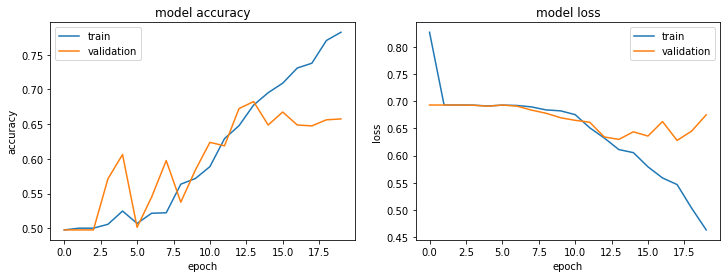

In [70]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])

In [71]:
from tensorflow.keras.models import load_model
best_model = load_model('best_animalCNN_model.h5')
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 64)               

In [72]:
y_pred_proba = best_model.predict(X_test[2:3])

In [73]:
X_test[2:3].shape

(1, 150, 150, 3)

In [74]:
y_test[2]

1

In [75]:
if y_pred_proba > 0.5 :
    print('dog')
else:
    print('cat')

dog


In [76]:
(y_pred_proba)

array([[0.7007417]], dtype=float32)

In [77]:
y_test[:5]

array([0, 0, 1, 0, 1])

In [78]:
y_pred_proba2 = model.predict(X_test[2:3])

In [79]:
if y_pred_proba2 > 0.5 :
    print('dog')
else:
    print('cat')

dog


In [80]:
y_test[0]

0

In [81]:
y_pred_proba3 = best_model.predict(X_test[0:1])

In [82]:
if y_pred_proba3 > 0.5 :
    print('dog')
else:
    print('cat')

cat


In [85]:
# img10 = cv2.imread()
# plt.imshow(img10)

In [86]:
# Pre-trained 모델 가져오기 (VGG16)
from tensorflow.keras.applications import ResNet50
cnn_base = ResNet50(include_top=False, weights='imagenet', 
                 input_shape=[150, 150, 3],classes=10)  

In [87]:
## 딥러닝 모델을 만들어보자.
# 라이브러리 설정
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape
from tensorflow.keras.layers import BatchNormalization

# 랜덤 시드 고정
SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED) 

In [88]:
# Transfer 모델 생성
def build_transfer():
    transfer_model = Sequential()
    transfer_model.add(cnn_base) 
    transfer_model.add(Flatten()) 

    transfer_model.add(Dense(units=64, activation='relu'))
    transfer_model.add(Dropout(rate=0.5))
    transfer_model.add(Dense(units=32, activation='relu'))
    transfer_model.add(Dropout(rate=0.5))
    transfer_model.add(Dense(units=10, activation='softmax'))

    transfer_model.compile(optimizer='adam', 
                    loss='sparse_categorical_crossentropy', 
                    metrics=['accuracy'])


    return transfer_model

transfer_model = build_transfer()
transfer_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                3276864   
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [ ]:
# tm_history = transfer_model.fit(X_train, y_train, batch_size=256, epochs=20,
#                         validation_split=0.1, verbose=0) 

# plot_metrics(history=tm_history, start=1, end=20)   

In [92]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
checkpoint = keras.callbacks.ModelCheckpoint('best_animalCNN_transfer_model.h5')
                                               
# tm_history = transfer_model.fit( X_train, 
#                          y_train,                
#                          batch_size=256,
#                          epochs=20,
#                          validation_data = (X_test, y_test),
#                          callbacks = [early_stopping, checkpoint],
#                          verbose=2
#                         )
tm2_history = transfer_model.fit( X_train, 
                         y_train,                
                         batch_size=256,
                         epochs=1,
                         validation_data=(X_test, y_test),
                         callbacks = [early_stopping, checkpoint],
                         verbose=2
                        )

13/13 - 342s - loss: 0.1114 - accuracy: 0.9750 - val_loss: 1.0485 - val_accuracy: 0.4975 - 342s/epoch - 26s/step


In [90]:
transfer_model.evaluate(X_test,y_test)

25/25 [==============================] - 20s 774ms/step - loss: 0.9869 - accuracy: 0.4975


[0.9869233965873718, 0.4975000023841858]

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(tm_history.history['accuracy'])
plt.plot(tm_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

plt.subplot(1, 2, 2)
plt.plot(tm_history.history['loss'])
plt.plot(tm_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])   